In [ ]:
#Import CNN Libaries (tensorflow.keras)

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization, Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Import Decision Tree libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
# Created a Train Test Split
# Normalized the data by dividing by 255 to rescale the image from 0 to 1

(X_trainTree, y_trainTree), (X_testTree, y_testTree) = datasets.cifar10.load_data()

X_trainTree = X_trainTree / 255.0
X_testTree = X_testTree / 255.0

print("X_train shape: ", X_trainTree.shape)
print("y_train shape: ", y_trainTree.shape)
print("X_test shape: ", X_testTree.shape)
print("y_test shape: ", y_testTree.shape)

170498071/170498071 [==============================] - 13s 0us/step
X_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
X_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [ ]:
#Due to decision tree only going up to 2D arrays, flattened the 3D arrays of X_trainTree and X_testTree

num_samples_train, height_train, width_train, num_channels_train = X_trainTree.shape
X_trainTree_flattened = X_trainTree.reshape(num_samples_train, height_train * width_train * num_channels_train)

num_samples_test, height_test, width_test, num_channels_test = X_testTree.shape
X_testTree_flattened = X_testTree.reshape(num_samples_test, height_test * width_test * num_channels_test)



In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_trainTree_flattened,y_trainTree)

#Predict the response for test dataset
y_pred = clf.predict(X_testTree_flattened)

In [ ]:
# printed accuracy of the decision tree model
# used to show why a deep learning model is needed for image classification
print("Accuracy:",metrics.accuracy_score(y_testTree, y_pred))

Accuracy: 0.267


In [ ]:
# Created a Train Test Split
# Normalized the data by dividing by 255 to rescale the image from 0 to 1

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
X_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


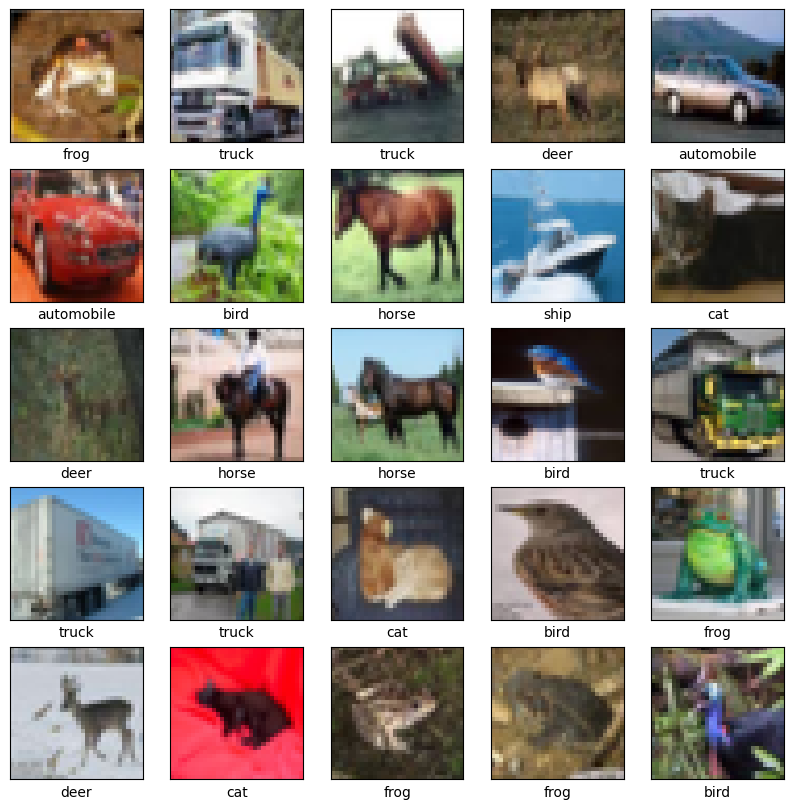

In [ ]:
# Displayed the images the image cateogories in the dataset

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
# Created a train validation split for analysis

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)

X_train shape:  (40000, 32, 32, 3)
y_train shape:  (40000, 1)
X_val shape:  (10000, 32, 32, 3)
y_val shape:  (10000, 1)


In [ ]:
#created a cnn model using the relu activation
#did 3 convolutions and 3 maxpoolings (2 x 2)
#then flattened the model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
#compiled the model for loss and acuracy analysis and fit the model over 20 epochs
#used the validation data for metric testing

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_val, y_val))

Epoch 1/20
1250/1250 [==============================] - 11s 5ms/step - loss: 1.5932 - accuracy: 0.4138 - val_loss: 1.3549 - val_accuracy: 0.5227
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2326 - accuracy: 0.5591 - val_loss: 1.2114 - val_accuracy: 0.5764
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0805 - accuracy: 0.6188 - val_loss: 1.0358 - val_accuracy: 0.6366
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9737 - accuracy: 0.6601 - val_loss: 0.9993 - val_accuracy: 0.6580
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8921 - accuracy: 0.6880 - val_loss: 0.9341 - val_accuracy: 0.6768
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8245 - accuracy: 0.7113 - val_loss: 0.9179 - val_accuracy: 0.6804
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7661 - accuracy: 0.7304 - val_loss: 0.9241 - val_accuracy

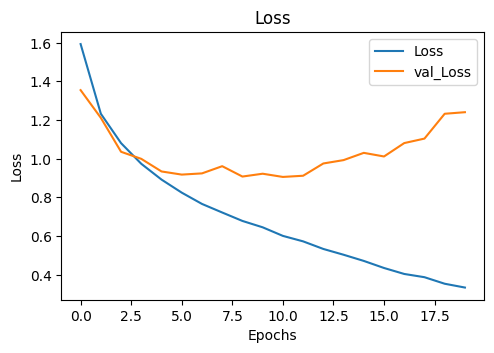

In [ ]:
#graph of the loss function between the training data and the validiation data

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

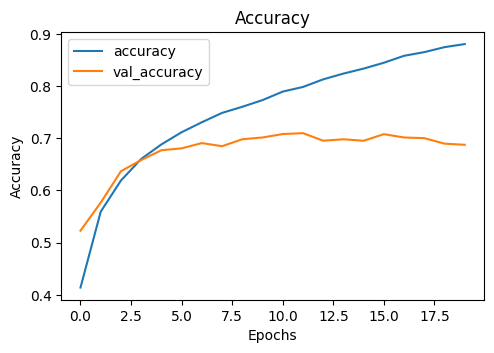

In [ ]:
#graph of the accuracy between the training data and the validiation data

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
# created a new train test split in order to make a better model
# normalized the model from 0 to 1
# augmented the model to have a horizontal flip which improves generalizability

(X_trainTwo, y_trainTwo), (X_testTwo, y_testTwo) = datasets.cifar10.load_data()


X_trainTwo = X_trainTwo / 255.0
X_testTwo = X_testTwo / 255.0

X_trainTwo, X_valTwo, y_trainTwo, y_valTwo = train_test_split(X_trainTwo, y_trainTwo, test_size = 0.2)

image_generator = ImageDataGenerator(horizontal_flip = True)

train_generator = image_generator.flow(X_train, y_train)


In [ ]:
# created a second model and improved problems with overfitting
# used batch normalization aafter each layer to improve the reliability and efficiency of the network
# used a dropout function to reduce overfitting by getting rid of some of the neurons
# max pooling stil used (2 x 2)

modelTwo = models.Sequential()
modelTwo.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
modelTwo.add(BatchNormalization())

modelTwo.add(Dropout(0.25))

modelTwo.add(layers.MaxPooling2D((2, 2)))
modelTwo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelTwo.add(BatchNormalization())

modelTwo.add(layers.MaxPooling2D((2, 2)))
modelTwo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelTwo.add(BatchNormalization())


modelTwo.add(layers.Flatten())
modelTwo.add(layers.Dense(64, activation='relu'))
modelTwo.add(layers.Dense(10))

In [ ]:
# compiled the model for optimization through back propagation
# fit the model over 20 epochs and compared the training data to the validation data

modelTwo.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

historyTwo = model.fit(train_generator, epochs=20,
                    validation_data=(X_valTwo, y_valTwo))

Epoch 1/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.6764 - accuracy: 0.7763 - val_loss: 0.4935 - val_accuracy: 0.8327
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6193 - accuracy: 0.7928 - val_loss: 0.4745 - val_accuracy: 0.8406
Epoch 3/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.5939 - accuracy: 0.7966 - val_loss: 0.4513 - val_accuracy: 0.8491
Epoch 4/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.5613 - accuracy: 0.8078 - val_loss: 0.4531 - val_accuracy: 0.8480
Epoch 5/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.5479 - accuracy: 0.8136 - val_loss: 0.4650 - val_accuracy: 0.8447
Epoch 6/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.5277 - accuracy: 0.8179 - val_loss: 0.4566 - val_accuracy: 0.8468
Epoch 7/20
1250/1250 [==============================] - 8s 6ms/step - loss: 0.5217 - accuracy: 0.8185 - val_loss: 0.4593 - val_accuracy:

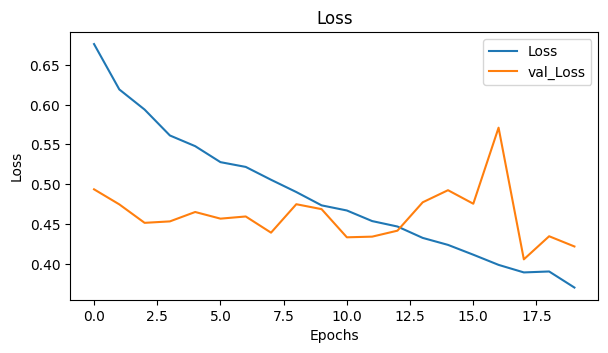

In [ ]:
#graph of the loss function between the training data and the validiation data

plt.figure(figsize=(15, 16))

plt.subplot(4, 2, 2)
plt.plot(historyTwo.history['loss'], label='Loss')
plt.plot(historyTwo.history['val_loss'], label='val_Loss')
plt.title('Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

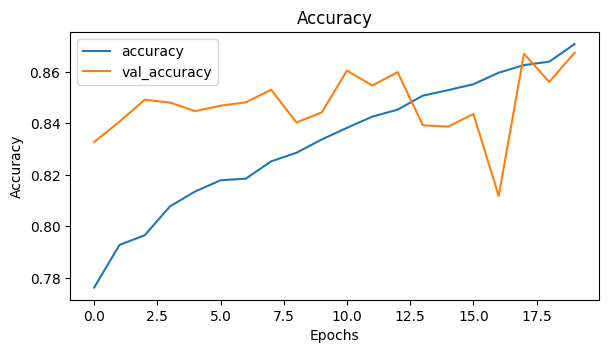

In [ ]:
#graph of the accuracy between the training data and the validiation data

plt.figure(figsize=(15, 16))

plt.subplot(4, 2, 2)
plt.plot(historyTwo.history['accuracy'], label='accuracy')
plt.plot(historyTwo.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()